<a href="https://colab.research.google.com/github/Muhammad0Awais/MS_Thesis/blob/experiment1/ResearchNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimentations
The purpose of this experiment is to test the performance of different classifiers with different datasets, the result of this experiment will be able to give us the answers to the following questions:


> *   Which Augmentation technique works best with with model?
*   Which Augmentation technique gives best accuracy for a specific model on a specific dataset?
*   Which Augmentation technique has given the best overall results?
*   Which ml model works best in all the dataset?
*   How changes in parameters are effecting the accuracy of a given model?
*   What Datasets are performing better with most of the models and most of augmentations?

These questions will be answered at the end of this experimentation, which will result into making a baseline of our research, after these experiments we will be able to know what is the effect of datasets, and augmentation techniques on ML models.

> In the next sections we are Exploring datasets, getting small chunks from datasets, setting up the ml models, and writing the code for augmentations, after compelition of these tasks, we will use those datasets to perform different experiments.


					
					
					
					
					
					

# Loading Datasets

In this section we are going to load the datasets which we are going to use. Our Datasets are as follows:


1.   CIFAR
2.   MNIST
3.   ImageNet
4.   IMDB-Wiki
5.   MS Coco



## Loading and plotting CIFAR 10 Dataset
[Example Used](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/)

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


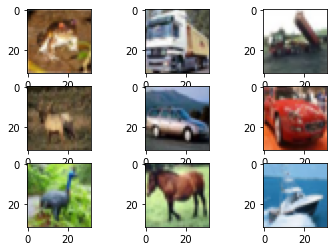

In [2]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # plot raw pixel data
  pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

### Creating a dictionary of cifar, and selection of only 5 images from each class

In [52]:
cifar_dic = dict()
checked = []
for i in range(20000):
  if len(checked) <= 9:  
    label = trainy[i][0]
    img = trainX[i]
    # print(label)
    if label in cifar_dic:
      # if len(cifar_dic[label]) > 10:
      #   print(label)
      #   checked.append(label)
      if label not in checked:  
        if len(cifar_dic[label]) < 5:
          cifar_dic[label].append(img)
        else: 
          checked.append(label)
      # if label not in checked:
      #   cifar_dic[label].append(img)
    else:
      cifar_dic[label] = [img]
  else:
    break
  

### Plotting the selected examples
In this section the selected images are visualized for the sake of understanding.

frog


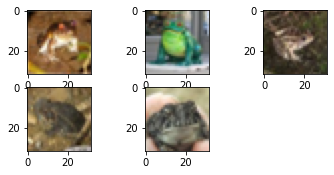

truck


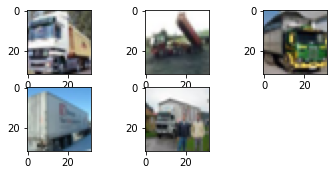

deer


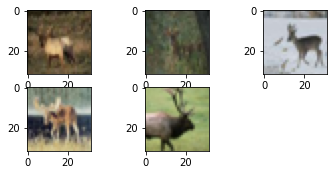

automobile


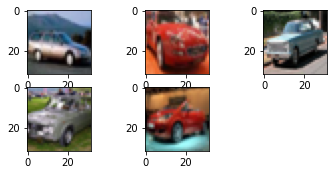

bird


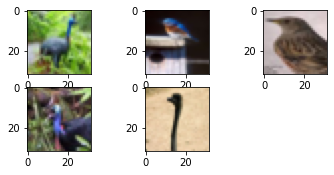

horse


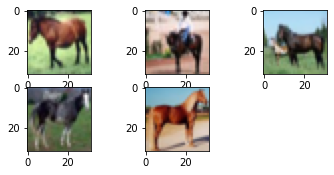

ship


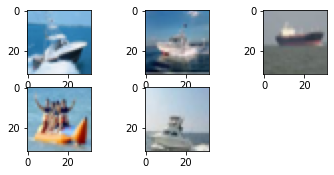

cat


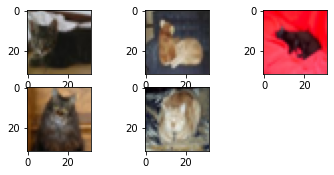

dog


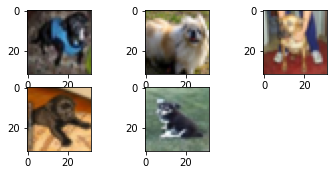

airplane


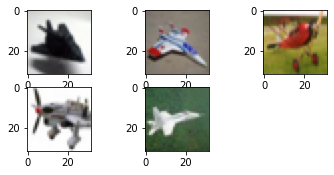

In [53]:
labelnames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for k in cifar_dic.keys():
  print(labelnames[k])
  i=0
  for j in cifar_dic[k]:
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(j)
    i+=1
  # show the figure
  pyplot.show()

## Loading MNIST Dataset
[Example Used](https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python)

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot

#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#shape of dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

#plotting
from matplotlib import pyplot
for i in range(9):	
pyplot.subplot(330 + 1 + i)
pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

## Loading ImageNet

## Loading IMDB-Wiki

## Loading MS Coco

## Fashion MNIST Dataset

In [ ]:
from keras.datasets import fashion_mnist
# (train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

# Loading ML Models

We are going to use the following Machine learning models for our experiements:


*   SVM - Support Vector Machines
*   CNN - Convolutional Neural Network
*   K-NN - K nearest Neighbours
*   MLP - Multi-layer preceptron
*   Auto-Encoders
*   HMM - Hidden Markov Model
*   HCRF - Hidden Common Random Field
*   Naive Bayes
*   Random Forest


## SVM
[Example Used](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [4]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm_clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))


## CNN
[Example code](https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python)

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

batch_size = 64
epochs = 20
num_classes = 10

cnn_clf = Sequential()
cnn_clf.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
cnn_clf.add(LeakyReLU(alpha=0.1))
cnn_clf.add(MaxPooling2D((2, 2),padding='same'))
cnn_clf.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
cnn_clf.add(LeakyReLU(alpha=0.1))
cnn_clf.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_clf.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
cnn_clf.add(LeakyReLU(alpha=0.1))                  
cnn_clf.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_clf.add(Flatten())
cnn_clf.add(Dense(128, activation='linear'))
cnn_clf.add(LeakyReLU(alpha=0.1))                  
cnn_clf.add(Dense(num_classes, activation='softmax'))

cnn_clf.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

cnn_clf.summary()

# cnn_train = cnn_clf.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
# test_eval = cnn_clf.evaluate(test_X, test_Y_one_hot, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

## K-NN
[Example Code](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)

# knn_clf.fit(X, y)

# print(knn_clf.predict([[1.1]]))

# print(knn_clf.predict_proba([[0.9]]))

## MLP
[Example Code](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

# clf.fit(X, y)

## Auto-Encoders
[Example code](https://blog.keras.io/building-autoencoders-in-keras.html)

In [ ]:
# import keras
# from keras import layers

# # This is the size of our encoded representations
# encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# # This is our input image
# input_img = keras.Input(shape=(784,))
# # "encoded" is the encoded representation of the input
# encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# # "decoded" is the lossy reconstruction of the input
# decoded = layers.Dense(784, activation='sigmoid')(encoded)

# # This model maps an input to its reconstruction
# autoencoder = keras.Model(input_img, decoded)



## HMM
[Example Code](https://hmmlearn.readthedocs.io/en/latest/tutorial.html)

In [ ]:
!pip install hmmlearn

     |████████████████████████████████| 378kB 5.2MB/s 


In [ ]:
from hmmlearn import hmm

hmm_clf = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)

# hmm_clf.fit([X]) 

# Z2 = hmm_clf.predict(X)

## HCRF
[Example code](https://pypi.org/project/pyhcrf/)

In [ ]:
!pip install pyhcrf

In [ ]:
from pyhcrf import HCRF
from sklearn.metrics import confusion_matrix

hcrf_clf = HCRF(num_states=3, optimizer_kwargs={'maxfun':200})
# hcrf_clf.fit(X, y)
# pred = hcrf_clf.predict(X)
# confusion_matrix(y, pred)

## Naive Bayes
[Example code](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# y_pred = gnb.fit(X_train, y_train).predict(X_test)

## Random Forests
[Example code](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_random_forest = RandomForestClassifier(max_depth=2, random_state=0)
# clf_random_forest.fit(X, y)

# print(clf_random_forest.predict([[0, 0, 0, 0]]))

# Data augmentation Libraries

Different libraries can be used, but the techniques are as follow:


*   Geometric-Augmentations
*   Photo-metric Augmentations
*   Dataset augmentations
*   Auto-Augment
*   Smart-Augment
*   GAN's
*   Transfer-Learning



## Geometric-Augmentations

[Example code](https://www.geeksforgeeks.org/python-data-augmentation/)

In [71]:
# from keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(
#     rotation_range=0,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range = 0.2,
#     horizontal_flip=True,
#     validation_split=0.20)
# datagen.fit(x_train)

# # fits the model on batches with real-time data augmentation:
# model.fit(datagen.flow(x_train, y_train, batch_size=32),
#           steps_per_epoch=len(x_train) / 32, epochs=epochs)
import cv2
import numpy as np
from scipy import ndimage
# from keras_preprocessing.image import random_rotation, random_zoom, random_shift, random_shear

class geometric:
  def __init__(self, image):
    self.image = image
    self.height, self.width = self.image.shape[:2]

  def rotate(self, angle=45):
    # print("function",self.image)
    rotated = ndimage.rotate(self.image, angle)
    # print("resutl", rotated)
    # image_center = tuple(np.array(self.image.shape[1::-1]) / 2)
    # rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    # result = cv2.warpAffine(self.image, rot_mat, self.image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return rotated
  
  def flip(self, f_type = "h"):
    if f_type == "h":
      # print("horizontal Filp")
      res = cv2.flip(self.image, -1)
    else:
      # print("vertical Flip")
      res = cv2.flip(self.image, 1)
    return res
  
  def resize(self, scale = 2):
    height, width = self.height+scale, self.width+scale
    res = cv2.resize(self.image, dsize=(height, width), interpolation=cv2.INTER_CUBIC)
    return res
  
  # def crop(self, scale):
  #   pass

  # def transpose(self, scale):
  #   pass


# Importing necessary functions
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# # Initialising the ImageDataGenerator class.
# # We will pass in the augmentation parameters in the constructor.
# datagen = ImageDataGenerator(
# 		rotation_range = 40,
# 		shear_range = 0.2,
# 		zoom_range = 0.2,
# 		horizontal_flip = True,
# 		brightness_range = (0.5, 1.5))
	
# # Loading a sample image
# img = load_img('image.jpg')
# # Converting the input sample image to an array
# x = img_to_array(img)
# # Reshaping the input image
# x = x.reshape((1, ) + x.shape)

# # Generating and saving 5 augmented samples
# # using the above defined parameters.
# i = 0
# for batch in datagen.flow(x, batch_size = 1,
# 						save_to_dir ='preview',
# 						save_prefix ='image', save_format ='jpeg'):
# 	i += 1
# 	if i > 5:
# 		break


## Photo-metric Augmentations

In [ ]:
class photoMetric:
  def sharpen(image):
    pass
  
  def blur(image):
    pass
  
  def brighten(image):
    pass

  def contrast(image):
    pass
  
  def invert(image):
    pass


## Dataset augmentations

In [ ]:
class datasetAugment:
  def combineDataset(dataset1, dataset2):
    pass

## Auto-Augment
[Example code](https://github.com/DeepVoltaire/AutoAugment)

In [ ]:
import PIL
from autoaugment import ImageNetPolicy
# image = PIL.Image.open("/content/image.jpg")
# policy = ImageNetPolicy()
# transformed = policy(image)
# transformed.save("tranImage.jpg")

## Smart-Augment

## GAN's

## Transfer-Learning

# Experiments

## Cifar 10 with geo-metric augmentations

In this part we'll make a new dataset after implementing new augmentations

In [61]:
k = list()

In [59]:
k

[]

### Rotation augmentation

In [67]:
#rotation effect
aug_rotate_dic = dict()
for key in cifar_dic.keys():
  aug_rotate_dic[key] = list()
  for im in cifar_dic[key]:
    gm_aug = geometric(im)
    rot = gm_aug.rotate()
    aug_rotate_dic[key].append(im)
    aug_rotate_dic[key].append(rot)
# im = cifar_dic[0][0]
# pyplot.imshow(im)
# pyplot.show()
# # print(im)
# gm_aug = geometric(im)
# im2 = gm_aug.flip()
# pyplot.imshow(im2)
# pyplot.show()

### Flip augmentation

In [72]:
aug_flip_dic = dict()
for key in cifar_dic.keys():
  aug_flip_dic[key] = list()
  for im in cifar_dic[key]:
    gm_aug = geometric(im)
    flip = gm_aug.flip()
    aug_flip_dic[key].append(im)
    aug_flip_dic[key].append(flip)

### Resize Augmentation

In [70]:
aug_resize_dic = dict()
for key in cifar_dic.keys():
  aug_resize_dic[key] = list()
  for im in cifar_dic[key]:
    gm_aug = geometric(im)
    resize = gm_aug.resize()
    aug_resize_dic[key].append(im)
    aug_resize_dic[key].append(resize)